In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("athlete_events.csv")

print(data.describe())

average_h = np.mean(data['Height'])
print (average_h)

median = data['Height'].median()
print (median)

deviation = np.std(data['Height'])
print (deviation)



                  ID            Age         Height         Weight  \
count  271116.000000  261642.000000  210945.000000  208241.000000   
mean    68248.954396      25.556898     175.338970      70.702393   
std     39022.286345       6.393561      10.518462      14.348020   
min         1.000000      10.000000     127.000000      25.000000   
25%     34643.000000      21.000000     168.000000      60.000000   
50%     68205.000000      24.000000     175.000000      70.000000   
75%    102097.250000      28.000000     183.000000      79.000000   
max    135571.000000      97.000000     226.000000     214.000000   

                Year  
count  271116.000000  
mean     1978.378480  
std        29.877632  
min      1896.000000  
25%      1960.000000  
50%      1988.000000  
75%      2002.000000  
max      2016.000000  
175.33896987366376
175.0
10.518437290884945


In [19]:
for sport in data['Sport'].unique():
    sport_data = data[data['Sport'] == sport]
    # laskee mediaani pituuden jokaiselle lajille ja korvaa NaN arvot
    if not sport_data['Height'].isnull().all():
        median_height = data[data['Sport']== sport]['Height'].median()
        data.loc[data['Sport'] == sport, 'Height'] = data.loc[data['Sport']==sport, 'Height'].fillna(median_height)

    # laskee mediaani painon jokaiselle lajille ja korvaa NaN arvot
    if not sport_data['Weight'].isnull().all():
        median_weight = data[data['Sport']== sport]['Weight'].median()
        data.loc[data['Sport'] == sport, 'Weight'] = data.loc[data['Sport']==sport, 'Weight'].fillna(median_weight)
    
    
    print(data)

            ID                      Name Sex   Age  Height  Weight  \
0            1                 A Dijiang   M  24.0   180.0    80.0   
1            2                  A Lamusi   M  23.0   170.0    60.0   
2            3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4      Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            5  Christine Jacoba Aaftink   F  21.0   185.0    82.0   
...        ...                       ...  ..   ...     ...     ...   
271111  135569                Andrzej ya   M  29.0   179.0    89.0   
271112  135570                  Piotr ya   M  27.0   176.0    59.0   
271113  135570                  Piotr ya   M  27.0   176.0    59.0   
271114  135571        Tomasz Ireneusz ya   M  30.0   185.0    96.0   
271115  135571        Tomasz Ireneusz ya   M  34.0   185.0    96.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summer       Barcelona   
1          

In [20]:
data['Medal'].fillna('No Medal', inplace=True)

In [21]:
data = data[data['Season'] != 'Winter']

missing_count = data.isnull().sum()
print(missing_count)




ID           0
Name         0
Sex          0
Age       9189
Height      54
Weight     172
Team         0
NOC          0
Games        0
Year         0
Season       0
City         0
Sport        0
Event        0
Medal        0
dtype: int64


In [22]:
average_h = np.mean(data['Height'])
print (average_h)

median = data['Height'].median()
print (median)

deviation = np.std(data['Height'])
print (deviation)


175.29300937536516
175.0
9.98797064470756


In [23]:
average_age = np.mean(data['Age'])
data['Age'].fillna(average_age, inplace=True)

average_height = np.mean(data['Height'])
data['Height'].fillna(average_height, inplace=True)
average_weight = np.mean(data['Weight'])
data['Weight'].fillna(average_weight, inplace=True)



missing_count = data.isnull().sum()
print(missing_count)


ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64


In [24]:
duplicate_rows = data.duplicated()


print (duplicate_rows.value_counts())
print(data[duplicate_rows])



False    221167
True       1385
Name: count, dtype: int64
            ID                                 Name Sex   Age  Height  Weight  \
1252       704                   Dsir Antoine Acket   M  27.0   175.0    76.0   
4282      2449               William Truman Aldrich   M  48.0   175.0    76.0   
4283      2449               William Truman Aldrich   M  48.0   175.0    76.0   
4862      2777               Hermann Reinhard Alker   M  43.0   175.0    76.0   
4864      2777               Hermann Reinhard Alker   M  43.0   175.0    76.0   
...        ...                                  ...  ..   ...     ...     ...   
269994  135072  Anna Katrina Zinkeisen (-Heseltine)   F  46.0   175.0    76.0   
269995  135072  Anna Katrina Zinkeisen (-Heseltine)   F  46.0   175.0    76.0   
269997  135072  Anna Katrina Zinkeisen (-Heseltine)   F  46.0   175.0    76.0   
269999  135073   Doris Clare Zinkeisen (-Johnstone)   F  49.0   175.0    76.0   
270200  135173                     Henri Achille Zo

<Axes: xlabel='Year', ylabel='count'>

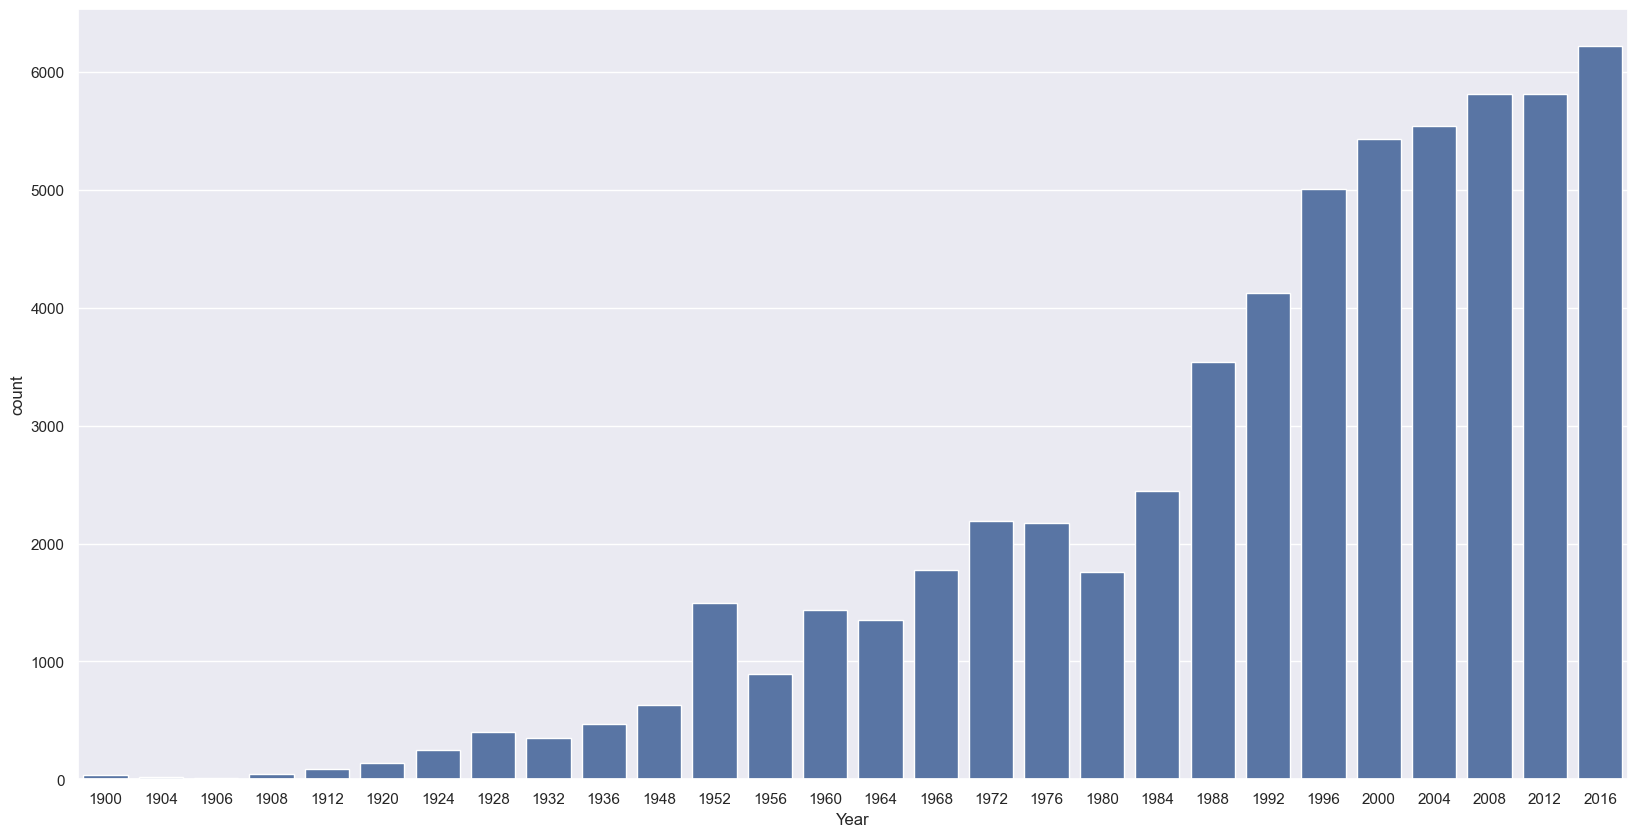

In [25]:
womenInOlympics = data[(data.Sex == 'F') & (data.Season == 'Summer')]

sns.set(style='darkgrid')
plt.figure(figsize = (20, 10))
sns.countplot(x='Year', data=womenInOlympics)


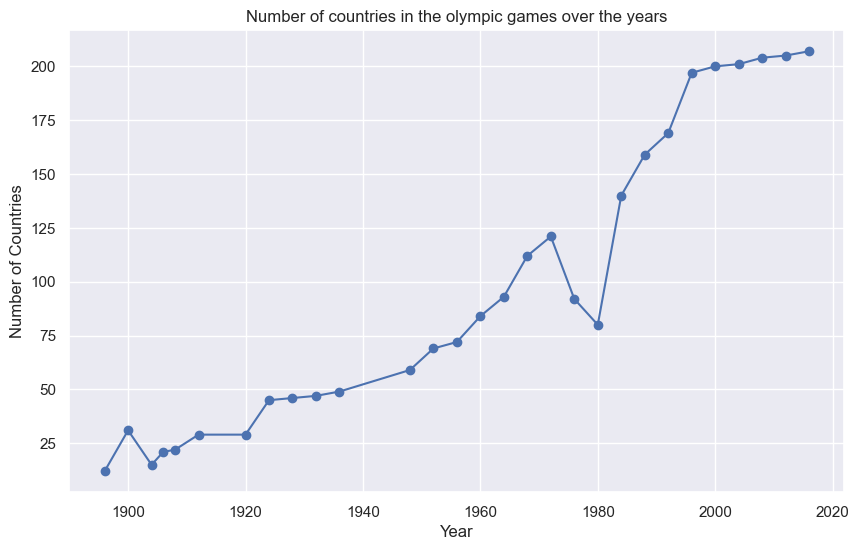

In [26]:
country_counts = data.groupby('Year')['NOC'].nunique()
plt.figure(figsize=(10, 6))
plt.plot(country_counts.index, country_counts.values, marker='o', linestyle='-', color='b')

plt.title('Number of countries in the olympic games over the years')
plt.xlabel('Year')
plt.ylabel('Number of Countries')

plt.grid(True)
plt.show()

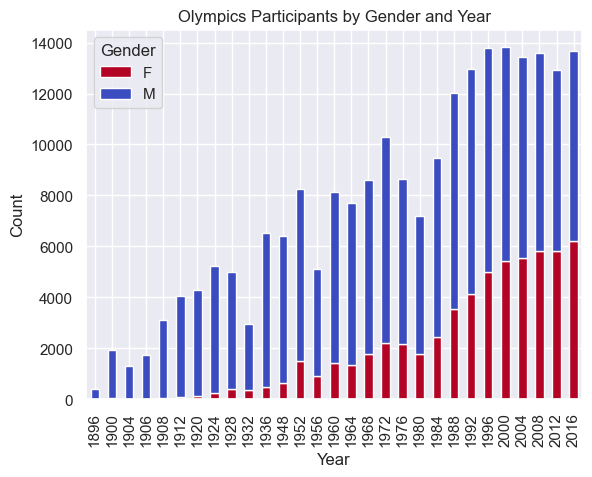

In [27]:
sex_count = data.groupby(['Year', 'Sex']).size().unstack().fillna(0)
ax = sex_count.plot(kind='bar', stacked=True, colormap='coolwarm_r')
ax.set_title('Olympics Participants by Gender and Year')
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.legend(title='Gender', loc='upper left')
plt.show()

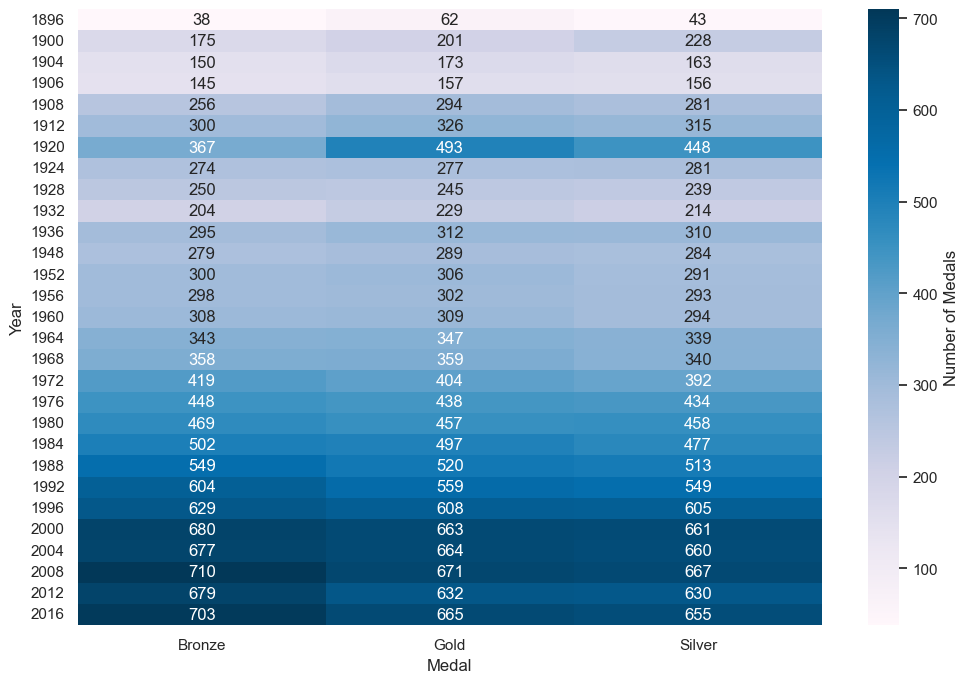

In [28]:
medal_data = data[data['Medal'] != 'No Medal']

pivot_table = pd.pivot_table(medal_data, values='ID', index='Year', columns='Medal', aggfunc='count', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='g', cmap='PuBu', cbar_kws={'label': 'Number of Medals'})
plt.show()

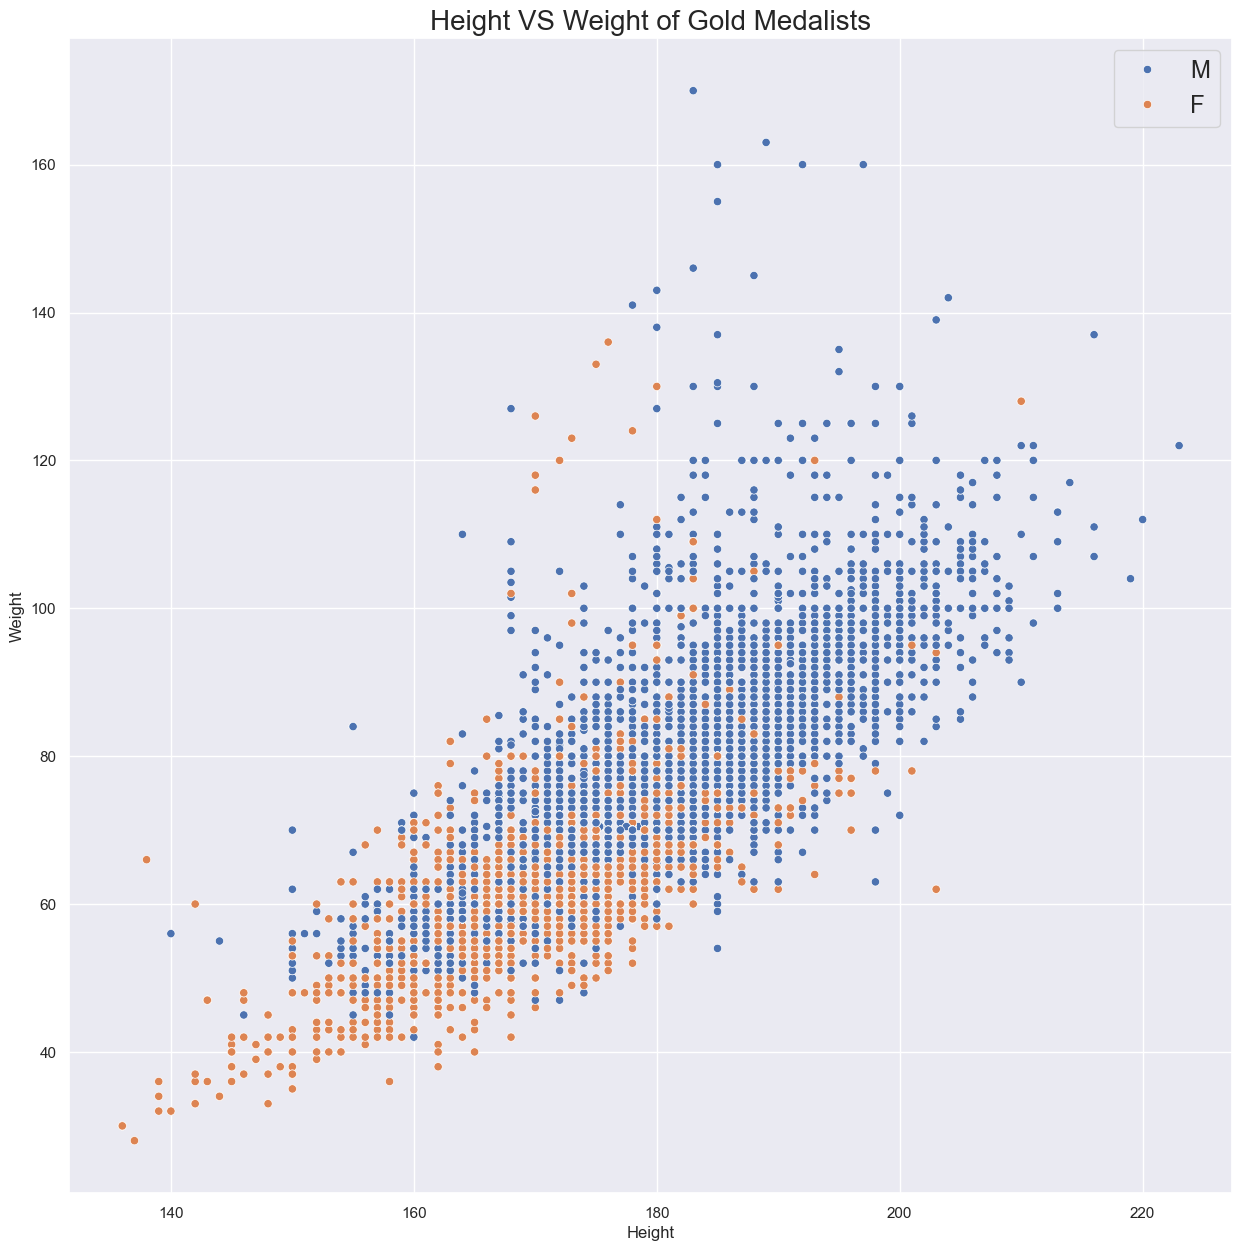

In [29]:
goldMedals = data[data['Medal'] == 'Gold']
goldMedalsHW = goldMedals[(goldMedals['Height'].notnull()) & (goldMedals['Weight'].notnull())]

plt.figure(figsize=(15, 15))
sns.scatterplot(x="Height", y="Weight", hue='Sex', data=goldMedalsHW)
plt.title('Height VS Weight of Gold Medalists', fontsize=20)
plt.legend(loc=1, fontsize='x-large')
plt.show()


In [30]:
exclude_percentiles = [25, 50, 75]
description = data.describe(percentiles=[p/100 for p in exclude_percentiles])



,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal
2,3,Gunnar Nielsen Aaby,M,24.0,175.0,71.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal
3,4,Edgar Lindenau Aabye,M,34.0,182.0,95.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,67.0,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No Medal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271106,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,No Medal
271107,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,No Medal
271108,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,No Medal
271109,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,No Medal
